In [ ]:
import matplotlib.pyplot as plt

In [ ]:
'''
common template used for drawing
'''

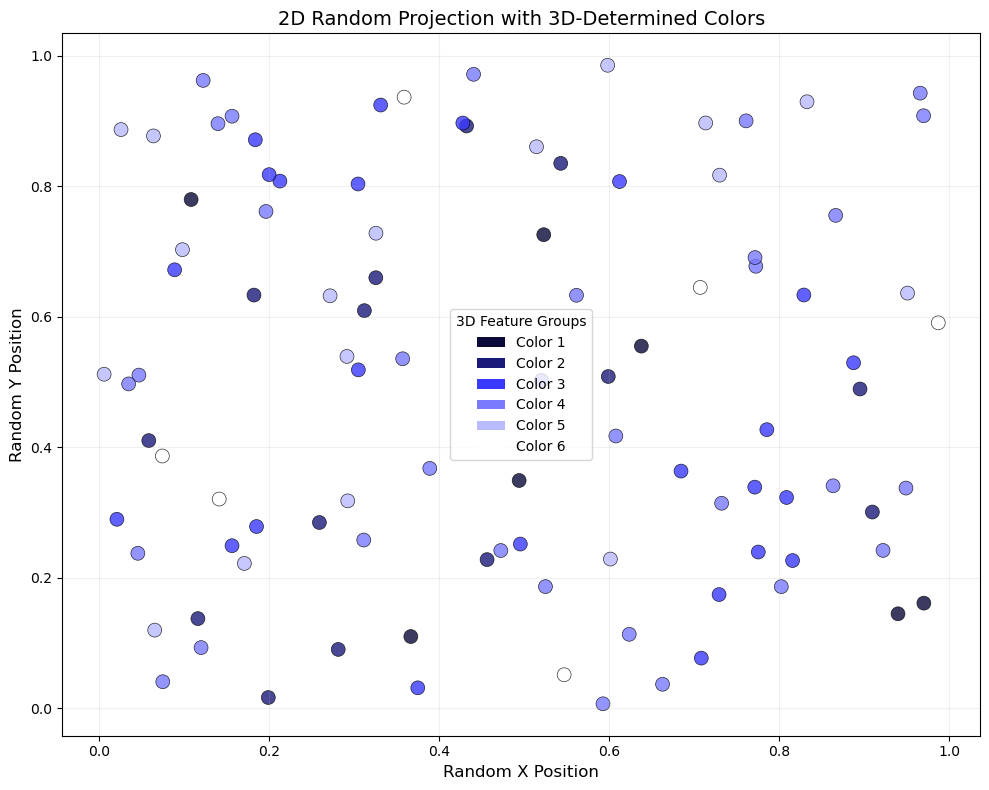

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import ListedColormap

data_3d = np.random.rand(100, 3)  # 100 points, 3 features each

def assign_colors(points, n_colors):
    """Assign colors based on position in 3D space"""
    # Normalize points to [0,1] range
    normalized = (points - points.min(axis=0)) / (points.max(axis=0) - points.min(axis=0))
    # Combine coordinates to get a single value for color mapping
    combined = normalized.sum(axis=1)  # Simple sum of normalized coordinates
    # Quantize into n_colors bins
    bins = np.linspace(0, 3, n_colors+1)  # Max sum is 3 (1+1+1)
    indices = np.digitize(combined, bins) - 1
    indices = np.clip(indices, 0, n_colors-1)
    return indices

color_indices = assign_colors(data_3d, len(colors))
point_colors = [colors[i] for i in color_indices]

# 4. Create random 2D positions for visualization
np.random.seed(42)  # For reproducibility
x_pos = np.random.rand(len(data_3d))
y_pos = np.random.rand(len(data_3d))

# 5. Create the plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    x_pos, y_pos,
    c=point_colors,  # Use our assigned colors
    s=100,          # Marker size
    alpha=0.8,      # Transparency
    edgecolor='k',  # Black borders
    linewidth=0.5
)

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=f'Color {i+1}') 
                  for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, title="3D Feature Groups")

plt.title("2D Random Projection with 3D-Determined Colors", fontsize=14)
plt.xlabel("Random X Position", fontsize=12)
plt.ylabel("Random Y Position", fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()